In [3]:
import os
os.listdir('/kaggle/input')

['dataset']

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input/dataset'):
    c = 0
    for filename in filenames:
        c += 1
        
    if c>0: 
        print("{} : {} images".format(dirname,c))
        print("--------------")

/kaggle/input/dataset/Cupboard_open_or_close : 132 images
--------------
/kaggle/input/dataset/Run : 146 images
--------------
/kaggle/input/dataset/Buzz : 106 images
--------------
/kaggle/input/dataset/Crackle : 154 images
--------------
/kaggle/input/dataset/Acoustic_guitar : 150 images
--------------
/kaggle/input/dataset/Strum : 128 images
--------------
/kaggle/input/dataset/Frying_(food) : 121 images
--------------
/kaggle/input/dataset/Whispering : 140 images
--------------
/kaggle/input/dataset/Water_tap_and_faucet : 225 images
--------------
/kaggle/input/dataset/Writing : 172 images
--------------
/kaggle/input/dataset/Toilet_flush : 143 images
--------------
/kaggle/input/dataset/Keys_jangling : 149 images
--------------
/kaggle/input/dataset/Microwave_oven : 145 images
--------------
/kaggle/input/dataset/Traffic_noise_and_roadway_noise : 165 images
--------------
/kaggle/input/dataset/Waves_and_surf : 149 images
--------------
/kaggle/input/dataset/Purr : 127 images
-----

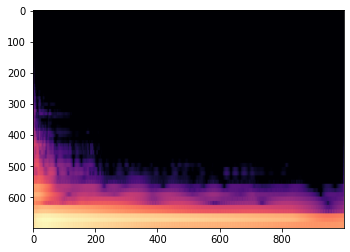

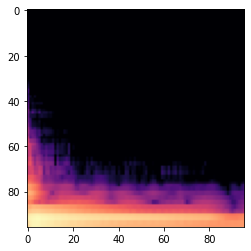

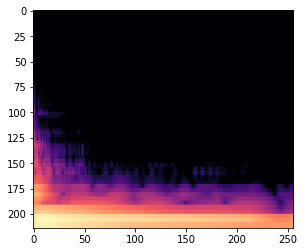

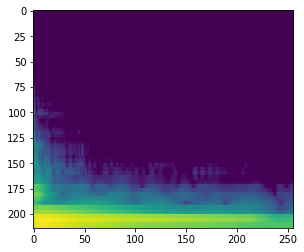

In [6]:
import cv2
import os
import matplotlib.pyplot as plt

imageOG = cv2.imread('/kaggle/input/dataset/Bass_guitar/2a72d742.png')
plt.imshow(cv2.cvtColor(imageOG, cv2.COLOR_BGR2RGB))
plt.show()
image1 = cv2.resize(imageOG, (96,96))
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.show()
image2 = cv2.resize(imageOG, (256,214))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

image3 = cv2.resize(imageOG, (256,214))
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
plt.imshow(image3)
plt.show()

In [7]:
print(image2.shape)
print(image3.shape)
print(image3)

(214, 256, 3)
(214, 256)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [222 226 234 ... 178 178 177]
 [241 225 231 ... 178 178 178]
 [241 224 231 ... 178 178 178]]


#### Data extraction and preparation

In [8]:
from keras import layers, metrics, applications, optimizers, losses
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder 

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
import copy

Using TensorFlow backend.


In [9]:
EPOCHS = 150
#INIT_LR = 1e-3
BS = 64
IMAGE_DIMS = (214, 256, 1)

In [10]:
imagePaths = []
for dirname, _, filenames in os.walk(r'/kaggle/input/dataset/'):
    for filename in filenames:
        imagePaths.append(os.path.join(dirname, filename))
        
imagePaths = sorted(imagePaths)
random.seed(42)
random.shuffle(imagePaths)

In [11]:
data = []
labels = []

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = img_to_array(image)
    data.append(image)
    
    l = label = imagePath.split(os.path.sep)[-2]
    labels.append((l,))
    
labels[0:5]

[('Knock',),
 ('Knock',),
 ('Zipper_(clothing)',),
 ('Accordion',),
 ('Bicycle_bell',)]

In [12]:
print(len(data))
print(len(labels))

12002
12002


In [13]:
labels2 = copy.deepcopy(labels)
labels3 = copy.deepcopy(labels)

In [14]:
labels2 = np.array(labels2)
le = LabelEncoder()
labels2 = le.fit_transform(labels2)
print(len(le.classes_))
print(labels2.shape)
print(le.classes_)

80
(12002,)
['Accelerating_and_revving_and_vroom' 'Accordion' 'Acoustic_guitar'
 'Applause' 'Bark' 'Bass_drum' 'Bass_guitar'
 'Bathtub_(filling_or_washing)' 'Bicycle_bell' 'Burping_and_eructation'
 'Bus' 'Buzz' 'Car_passing_by' 'Cheering' 'Chewing_and_mastication'
 'Child_speech_and_kid_speaking' 'Chink_and_clink' 'Chirp_and_tweet'
 'Church_bell' 'Clapping' 'Computer_keyboard' 'Crackle' 'Cricket' 'Crowd'
 'Cupboard_open_or_close' 'Cutlery_and_silverware'
 'Dishes_and_pots_and_pans' 'Drawer_open_or_close' 'Drip'
 'Electric_guitar' 'Fart' 'Female_singing'
 'Female_speech_and_woman_speaking' 'Fill_(with_liquid)' 'Finger_snapping'
 'Frying_(food)' 'Gasp' 'Glockenspiel' 'Gong' 'Gurgling' 'Harmonica'
 'Hi-hat' 'Hiss' 'Keys_jangling' 'Knock' 'Male_singing'
 'Male_speech_and_man_speaking' 'Marimba_and_xylophone' 'Mechanical_fan'
 'Meow' 'Microwave_oven' 'Motorcycle' 'Printer' 'Purr'
 'Race_car_and_auto_racing' 'Raindrop' 'Run' 'Scissors' 'Screaming'
 'Shatter' 'Sigh' 'Sink_(filling_or_washing)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
data = np.array(data, dtype="float")

In [16]:
(train_X, valid_X, train_y, valid_y) = train_test_split(data, labels2, test_size=0.2, random_state=2018)

In [17]:
print("Training: ", train_X.shape, train_y.shape)
print("Validation: ", valid_X.shape, valid_y.shape)

Training:  (9601, 214, 256, 1) (9601,)
Validation:  (2401, 214, 256, 1) (2401,)


#### Model 1

In [26]:
def top_3_accuracy(x, y):
    return metrics.sparse_top_k_categorical_accuracy(x,y,3)

def create_model():
    model = applications.mobilenet.MobileNet(
        input_shape = (214, 256, 1),
        classes = 80,
        weights=None
    )
    
    opt = optimizers.Adam(lr=4e-4)
    
    model.compile(
        optimizer = opt,
        loss = losses.sparse_categorical_crossentropy,
        metrics = [metrics.sparse_categorical_accuracy, top_3_accuracy,metrics.accuracy]
    )
    
    model.summary()
    return model

In [27]:
model = create_model()

Model: "mobilenet_1.00_214"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 214, 256, 1)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 215, 257, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 107, 128, 32)      288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 107, 128, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 107, 128, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 107, 128, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 107, 128, 32

In [28]:
fit_results = model.fit(
    train_X, train_y,
    epochs = EPOCHS,
    batch_size = BS,
    validation_data = (valid_X, valid_y),
    verbose=1
)

Train on 9601 samples, validate on 2401 samples
Epoch 1/150
9601/9601 [==============================] - 82s 9ms/step - loss: 3.7520 - sparse_categorical_accuracy: 0.0958 - top_3_accuracy: 0.2285 - accuracy: 0.0000e+00 - val_loss: 4.6781 - val_sparse_categorical_accuracy: 0.0108 - val_top_3_accuracy: 0.0308 - val_accuracy: 0.0000e+00
Epoch 2/150
9601/9601 [==============================] - 73s 8ms/step - loss: 2.9543 - sparse_categorical_accuracy: 0.2145 - top_3_accuracy: 0.4408 - accuracy: 0.0000e+00 - val_loss: 5.1380 - val_sparse_categorical_accuracy: 0.0100 - val_top_3_accuracy: 0.0392 - val_accuracy: 0.0000e+00
Epoch 3/150
9601/9601 [==============================] - 73s 8ms/step - loss: 2.5670 - sparse_categorical_accuracy: 0.2986 - top_3_accuracy: 0.5468 - accuracy: 0.0000e+00 - val_loss: 5.6798 - val_sparse_categorical_accuracy: 0.0129 - val_top_3_accuracy: 0.0358 - val_accuracy: 0.0000e+00
Epoch 4/150
9601/9601 [==============================] - 73s 8ms/step - loss: 2.2944 - s

9601/9601 [==============================] - 73s 8ms/step - loss: 0.4750 - sparse_categorical_accuracy: 0.7729 - top_3_accuracy: 0.9896 - accuracy: 0.0000e+00 - val_loss: 3.2874 - val_sparse_categorical_accuracy: 0.3590 - val_top_3_accuracy: 0.6826 - val_accuracy: 0.0000e+00
Epoch 58/150
9601/9601 [==============================] - 72s 8ms/step - loss: 0.4797 - sparse_categorical_accuracy: 0.7663 - top_3_accuracy: 0.9881 - accuracy: 0.0000e+00 - val_loss: 3.1607 - val_sparse_categorical_accuracy: 0.3344 - val_top_3_accuracy: 0.6310 - val_accuracy: 0.0000e+00
Epoch 59/150
9601/9601 [==============================] - 72s 8ms/step - loss: 0.4774 - sparse_categorical_accuracy: 0.7691 - top_3_accuracy: 0.9884 - accuracy: 0.0000e+00 - val_loss: 3.1721 - val_sparse_categorical_accuracy: 0.3607 - val_top_3_accuracy: 0.6610 - val_accuracy: 0.0000e+00
Epoch 60/150
9601/9601 [==============================] - 73s 8ms/step - loss: 0.4806 - sparse_categorical_accuracy: 0.7650 - top_3_accuracy: 0.98

9601/9601 [==============================] - 73s 8ms/step - loss: 0.3806 - sparse_categorical_accuracy: 0.7706 - top_3_accuracy: 0.9919 - accuracy: 0.0000e+00 - val_loss: 3.8929 - val_sparse_categorical_accuracy: 0.3782 - val_top_3_accuracy: 0.6772 - val_accuracy: 0.0000e+00
Epoch 114/150
9601/9601 [==============================] - 73s 8ms/step - loss: 0.3803 - sparse_categorical_accuracy: 0.7742 - top_3_accuracy: 0.9918 - accuracy: 1.3019e-06 - val_loss: 4.2921 - val_sparse_categorical_accuracy: 0.3744 - val_top_3_accuracy: 0.6880 - val_accuracy: 1.5618e-05
Epoch 115/150
9601/9601 [==============================] - 73s 8ms/step - loss: 0.3724 - sparse_categorical_accuracy: 0.7754 - top_3_accuracy: 0.9917 - accuracy: 0.0000e+00 - val_loss: 3.8960 - val_sparse_categorical_accuracy: 0.3644 - val_top_3_accuracy: 0.6822 - val_accuracy: 5.2062e-06
Epoch 116/150
9601/9601 [==============================] - 73s 8ms/step - loss: 0.3798 - sparse_categorical_accuracy: 0.7727 - top_3_accuracy: 0

Train on 9601 samples, validate on 2401 samples

Epoch 1/150
9601/9601 [==============================] - 82s 9ms/step - loss: 3.7520 - sparse_categorical_accuracy: 0.0958 - top_3_accuracy: 0.2285 - val_loss: 4.6781 - val_sparse_categorical_accuracy: 0.0108 - val_top_3_accuracy: 0.0308 

Epoch 25/150
9601/9601 [==============================] - 73s 8ms/step - loss: 0.6760 - sparse_categorical_accuracy: 0.7445 - top_3_accuracy: 0.9641 - val_loss: 2.9674 - val_sparse_categorical_accuracy: 0.3474 - val_top_3_accuracy: 0.6306

Epoch 50/150
9601/9601 [==============================] - 72s 8ms/step - loss: 0.5118 - sparse_categorical_accuracy: 0.7653 - top_3_accuracy: 0.9852 - val_loss: 3.2412 - val_sparse_categorical_accuracy: 0.3569 - val_top_3_accuracy: 0.6656

Epoch 75/150
9601/9601 [==============================] - 72s 8ms/step - loss: 0.4372 - sparse_categorical_accuracy: 0.7713 - top_3_accuracy: 0.9916 - val_loss: 3.3248 - val_sparse_categorical_accuracy: 0.3723 - val_top_3_accuracy: 0.6764

Epoch 100/150
9601/9601 [==============================] - 73s 8ms/step - loss: 0.3964 - sparse_categorical_accuracy: 0.7729 - top_3_accuracy: 0.9910 - val_loss: 4.0038 - val_sparse_categorical_accuracy: 0.3465 - val_top_3_accuracy: 0.6456 

Epoch 125/150
9601/9601 [==============================] - 72s 8ms/step - loss: 0.3620 - sparse_categorical_accuracy: 0.7762 - top_3_accuracy: 0.9925 - val_loss: 3.8774 - val_sparse_categorical_accuracy: 0.3640 - val_top_3_accuracy: 0.6635 

Epoch 150/150
9601/9601 [==============================] - 73s 8ms/step - loss: 0.3504 - sparse_categorical_accuracy: 0.7766 - top_3_accuracy: 0.9923 - val_loss: 4.9646 - val_sparse_categorical_accuracy: 0.3753 - val_top_3_accuracy: 0.6660 

(0.0, 1.0)

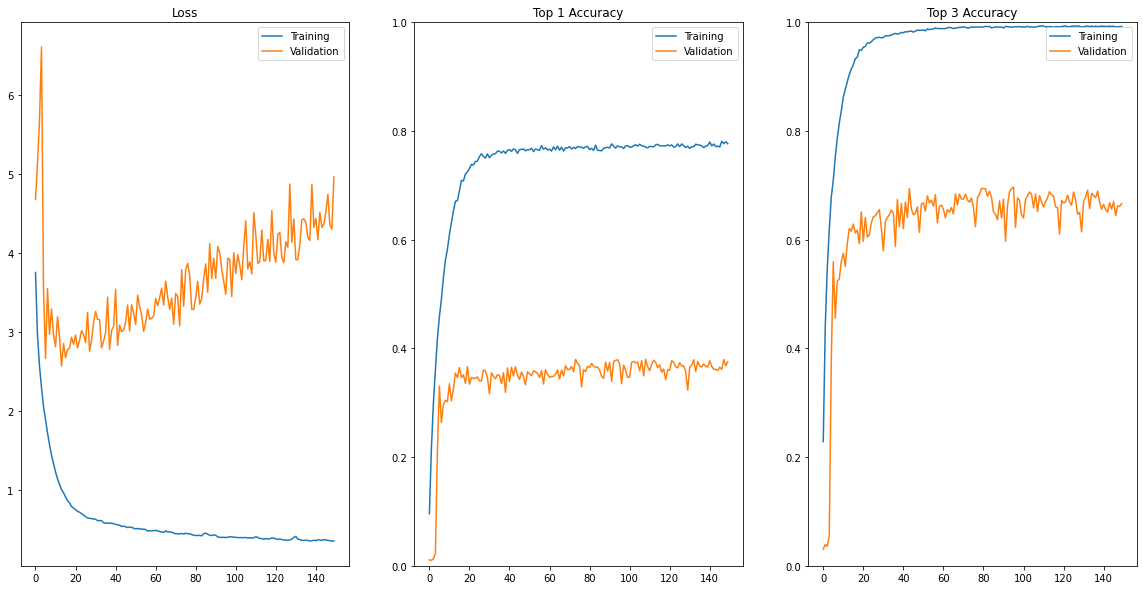

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.plot(fit_results.history['loss'], label='Training')
ax1.plot(fit_results.history['val_loss'], label='Validation')
ax1.legend()
ax1.set_title('Loss')

ax2.plot(fit_results.history['sparse_categorical_accuracy'], label='Training')
ax2.plot(fit_results.history['val_sparse_categorical_accuracy'], label='Validation')
ax2.legend()
ax2.set_title('Top 1 Accuracy')
ax2.set_ylim(0, 1)

ax3.plot(fit_results.history['top_3_accuracy'], label='Training')
ax3.plot(fit_results.history['val_top_3_accuracy'], label='Validation')
ax3.legend()
ax3.set_title('Top 3 Accuracy')
ax3.set_ylim(0, 1)

In [32]:
model.save('full_fsd_cnn.h5')

In [33]:
f = open("le.pickle", "wb")
f.write(pickle.dumps(le))
f.close()